<a href="https://colab.research.google.com/github/linked0/deep-learning/blob/master/AAMY/dlnd_cifar10_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2019/04/29 작성 시작

## 1. Load CIFAR-10 Databse

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


## 2. Visualize the First 24 Training Images

[[ 48  30  35]
 [128  95 101]
 [156 135 136]
 [140 134 130]
 [154 151 151]
 [204 202 207]
 [178 179 181]
 [174 169 167]
 [173 159 158]
 [167 154 152]
 [141 127 126]
 [133 122 120]
 [113 105 103]
 [116 101  99]
 [109  92  88]
 [111  96  88]
 [175 152 132]
 [151 143 112]
 [ 56  64  31]
 [ 37  51  22]
 [ 38  51  27]
 [ 20  31  12]
 [ 25  37  18]
 [ 69  81  55]
 [ 29  41  21]
 [ 13  23  13]
 [ 17  28  16]
 [ 16  26  13]
 [ 27  36  21]
 [ 41  44  34]
 [ 16  18  14]
 [  7   9   7]]


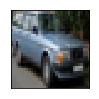

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(1):
  ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
  sample = x_train[i+201]
  print(sample[0])
  sample2 = np.squeeze(sample)
  ax.imshow(sample2)
  

In [19]:
print(sample2[0])

[[ 48  30  35]
 [128  95 101]
 [156 135 136]
 [140 134 130]
 [154 151 151]
 [204 202 207]
 [178 179 181]
 [174 169 167]
 [173 159 158]
 [167 154 152]
 [141 127 126]
 [133 122 120]
 [113 105 103]
 [116 101  99]
 [109  92  88]
 [111  96  88]
 [175 152 132]
 [151 143 112]
 [ 56  64  31]
 [ 37  51  22]
 [ 38  51  27]
 [ 20  31  12]
 [ 25  37  18]
 [ 69  81  55]
 [ 29  41  21]
 [ 13  23  13]
 [ 17  28  16]
 [ 16  26  13]
 [ 27  36  21]
 [ 41  44  34]
 [ 16  18  14]
 [  7   9   7]]


## 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [0]:
# rescale [0, 255] --> [0, 1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## 4. Break Dataset into Training, Testing, and Validation Sets

In [21]:
from keras.utils import np_utils

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validataion samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validataion samples


## 5. Create and Configure Augmented Image Generator

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
  width_shift_range=0.1, # randomly shift images horizontally (10% of total width)
  height_shift_range=0.1, # randomly shift images vertically (10% of total height)
  horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)